### Import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import os
import torch

### OS Module

In [10]:
cur_dir = os.getcwd()                                                      #get current path
print(cur_dir)
file_list = os.listdir(cur_dir)                                            #get file list in directory
print(file_list)
tutorial_path = os.path.join(cur_dir, file_list[0])
print(tutorial_path)

# os.makedirs('./new_folder', exist_ok=True)
os.makedirs(os.path.join(cur_dir, 'new_folder'), exist_ok=True)            #create folder


/mnt/f/Workspace/AILAB-isaac-sim-pick-place/lecture/1-1
['basic_tutorial.ipynb', 'debug_example.py', 'image_example.png', 'new_folder', 'practice_note.ipynb']
/mnt/f/Workspace/AILAB-isaac-sim-pick-place/lecture/1-1/basic_tutorial.ipynb


## Numpy

In [5]:
scores = [10, 50, 78, 90, 89, 54]
arr = np.array(scores)
print(type(scores))
print(type(arr))

<class 'list'>
<class 'numpy.ndarray'>


자료형 설정 및 변환

In [2]:
int_np = np.array([0,1,2,3,4], dtype=np.uint8)
float_np = np.array([0,1.1,2.2,3.3,4.4], dtype='float64')
print(int_np.dtype, float_np.dtype)

int2float = int_np.astype(dtype='float64')                                #change data type
print(int2float.dtype)

uint8 float64
float64


In [7]:
scores_1 = [[34,56,23,89], 
            [11,45,76,34]]

second_arr = np.array(scores_1)

print(second_arr)
print(second_arr.shape)

[[34 56 23 89]
 [11 45 76 34]]
(2, 4)


다차원 배열-zeros, ones

In [8]:
ones = np.ones(5)
zeros = np.zeros((2,4))

print(ones)
print(zeros)

[1. 1. 1. 1. 1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Numpy - calculation

In [13]:
ones_1 = np.ones((3,3))
ones_2 = np.ones((3,3))
sum = ones_1+ones_2

print(ones_1)
print(ones_2)
print(sum)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


기초연산 : 스칼라 곱 (Dot product), 행렬 곱(Matrix Multiplication)

In [14]:
dot = ones_1 * ones_2
mat_mul = ones_1@ones_2
print(dot)
print(mat_mul)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


### Numpy - Random

In [29]:
print(np.random.rand(3,2))

[[0.82352064 0.57102698]
 [0.68998862 0.98949928]
 [0.67056308 0.72398504]]


In [32]:
print(np.random.randint(1, 10, (3,2)))

[[3 9]
 [2 5]
 [6 2]]


In [33]:
print(np.random.uniform(1, 10, (3,2)))

[[2.34737716 9.78607488]
 [7.14851547 6.84896274]
 [6.63297174 1.26898898]]


## Tensor

In [20]:
empty_tensor = torch.empty(5,3)
zero_tensor = torch.zeros(5,3)
ones_tensor = torch.ones(5,3)
rand_tensor = torch.rand(5,3)

In [22]:
print(empty_tensor)
print(zero_tensor)
print(ones_tensor)
print(rand_tensor)

tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28],
        [1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22],
        [2.1715e-18, 2.0805e+23, 6.7647e+22],
        [2.1068e-07, 2.1272e+23, 1.6535e-04]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.4012, 0.4926, 0.6392],
        [0.2562, 0.5872, 0.9855],
        [0.8695, 0.5780, 0.0316],
        [0.3556, 0.2882, 0.8447],
        [0.8627, 0.4297, 0.2498]])


In [40]:
print(rand_tensor.shape)
print(rand_tensor.dtype)
print(rand_tensor.max())
print(rand_tensor.min())

torch.Size([5, 3])
torch.float32
tensor(0.9855)
tensor(0.0316)


In [46]:
int_tensor = rand_tensor.type("torch.ByteTensor")
print(int_tensor.dtype)

torch.uint8


In [55]:
print(rand_tensor.shape)
rand_tensor_view = rand_tensor.view(-1)
print(rand_tensor_view)
print(rand_tensor_view.shape)
rand_tensor_reshape = rand_tensor.reshape((3,5))
print(rand_tensor_reshape)
print(rand_tensor_reshape.shape)

torch.Size([5, 3])
tensor([0.4012, 0.4926, 0.6392, 0.2562, 0.5872, 0.9855, 0.8695, 0.5780, 0.0316,
        0.3556, 0.2882, 0.8447, 0.8627, 0.4297, 0.2498])
torch.Size([15])
tensor([[0.4012, 0.4926, 0.6392, 0.2562, 0.5872],
        [0.9855, 0.8695, 0.5780, 0.0316, 0.3556],
        [0.2882, 0.8447, 0.8627, 0.4297, 0.2498]])
torch.Size([3, 5])


In [4]:
x = torch.tensor([[0.5054, 0.9297, 0.7099],
        [0.2999, 0.3026, 0.2200],
        [0.8432, 0.3939, 0.5679],
        [0.5970, 0.3242, 0.8363]])
y = torch.tensor([[0.9742, 0.1757, 0.1224],
        [0.8798, 0.4719, 0.7299],
        [0.8601, 0.4764, 0.3921],
        [0.3018, 0.1983, 0.4925]])

Tensor 기본 연산

In [57]:
x = torch.rand(4,3)
y = torch.rand(4,3)
print(x)
print(y)

tensor([[0.5054, 0.9297, 0.7099],
        [0.2999, 0.3026, 0.2200],
        [0.8432, 0.3939, 0.5679],
        [0.5970, 0.3242, 0.8363]])
tensor([[0.9742, 0.1757, 0.1224],
        [0.8798, 0.4719, 0.7299],
        [0.8601, 0.4764, 0.3921],
        [0.3018, 0.1983, 0.4925]])


Tensor 기본 연산 : 행렬 합

In [58]:
tensor_sum = torch.add(x,y)
print(tensor_sum)

tensor([[1.4796, 1.1054, 0.8323],
        [1.1797, 0.7744, 0.9500],
        [1.7033, 0.8702, 0.9601],
        [0.8988, 0.5225, 1.3289]])


Tensor 기본 연산 : 행렬 곱

In [6]:
tensor_mul = torch.mul(x,y)
print(tensor_mul)

tensor([[0.4924, 0.1633, 0.0869],
        [0.2639, 0.1428, 0.1606],
        [0.7252, 0.1877, 0.2227],
        [0.1802, 0.0643, 0.4119]])


Tensor 합치기 : concatenate

In [5]:
tensor_cat = torch.cat([x,y], dim=0)
print(tensor_cat)
print(tensor_cat.shape)

tensor([[0.5054, 0.9297, 0.7099],
        [0.2999, 0.3026, 0.2200],
        [0.8432, 0.3939, 0.5679],
        [0.5970, 0.3242, 0.8363],
        [0.9742, 0.1757, 0.1224],
        [0.8798, 0.4719, 0.7299],
        [0.8601, 0.4764, 0.3921],
        [0.3018, 0.1983, 0.4925]])
torch.Size([8, 3])


Tensor 합치기 : stack

In [7]:
tensor_stack = torch.stack([x,y], dim=0)
print(tensor_stack)
print(tensor_stack.shape)

tensor([[[0.5054, 0.9297, 0.7099],
         [0.2999, 0.3026, 0.2200],
         [0.8432, 0.3939, 0.5679],
         [0.5970, 0.3242, 0.8363]],

        [[0.9742, 0.1757, 0.1224],
         [0.8798, 0.4719, 0.7299],
         [0.8601, 0.4764, 0.3921],
         [0.3018, 0.1983, 0.4925]]])
torch.Size([2, 4, 3])


## Image Library

### Read image with Opencv and plot with Matplotlib

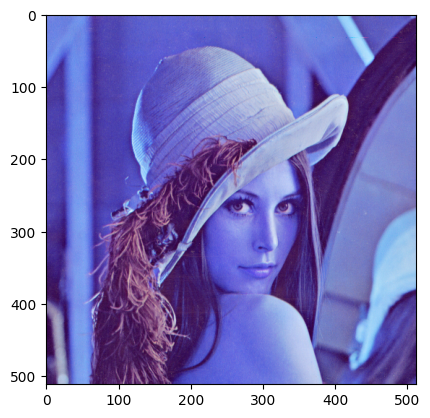

In [9]:
img_root = './image_example.png'
img = cv2.imread(img_root)
plt.imshow(img)
plt.show()
img_bgr = img.copy()

### Check image detail

In [10]:
print(img_bgr.shape)
print(img_bgr.dtype)
print(np.max(img_bgr), np.min(img_bgr))

(512, 512, 3)
uint8
255 3


### 색상 변환 opencv

RGB image shape : (512, 512, 3)
BGR image shape : (512, 512, 3)
Gray image shape : (512, 512)
Gray2RGB image shape : (512, 512, 3)


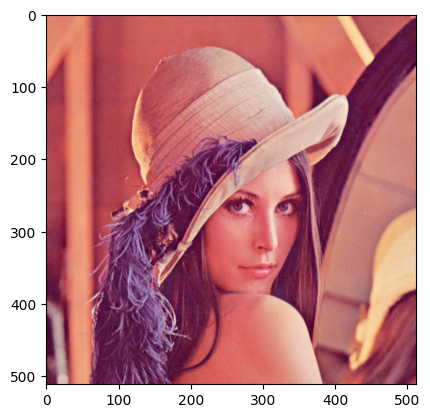

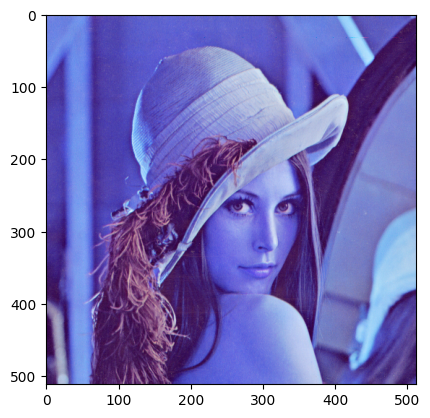

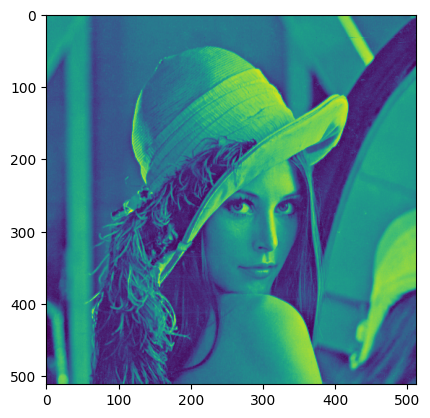

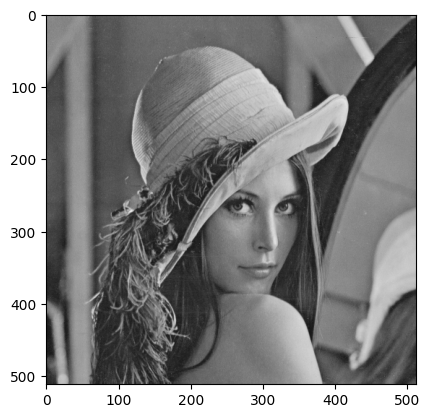

In [11]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_RGB2GRAY)
img_gray2rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)

print("RGB image shape : {}".format(img_rgb.shape))
print("BGR image shape : {}".format(img_bgr.shape))
print("Gray image shape : {}".format(img_gray.shape))
print("Gray2RGB image shape : {}".format(img_gray2rgb.shape))

plt.imshow(img_rgb)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(img_gray)
plt.show()
plt.imshow(img_gray2rgb)
plt.show()

### 여러개의 그래프(이미지) 그리기 - matplotlib

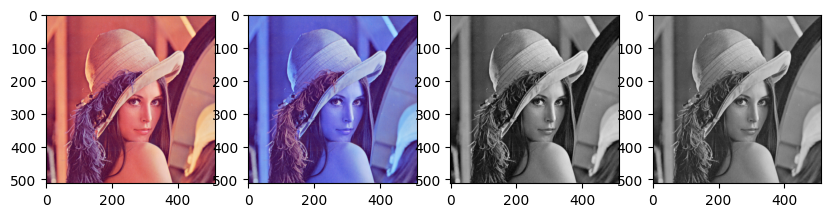

In [12]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(img_rgb)
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(img_bgr)
ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(img_gray, cmap='gray')
ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(img_gray2rgb)
plt.show()

### 여러개의 그래프(이미지) 그리기 - opencv

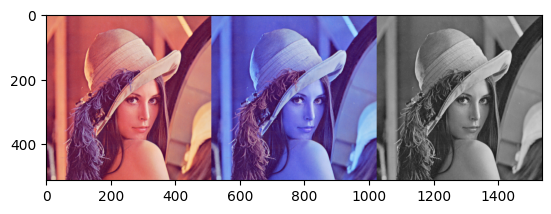

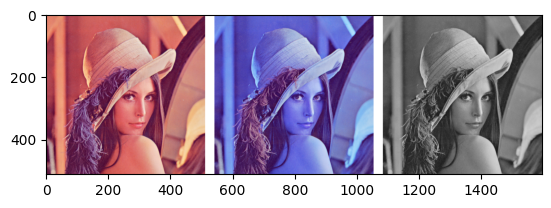

In [13]:
hcat = cv2.hconcat([img_rgb, img_bgr, img_gray2rgb])
plt.imshow(hcat)
plt.show()

pad = np.ones((img.shape[0], 30, 3)).astype(np.uint8) * 255
hcat_2 = cv2.hconcat([img_rgb, pad, img_bgr, pad, img_gray2rgb])
plt.imshow(hcat_2)
plt.show()

### 이미지 사이즈 변환

original image shape : (512, 512, 3)
resized image shape : (100, 100, 3)


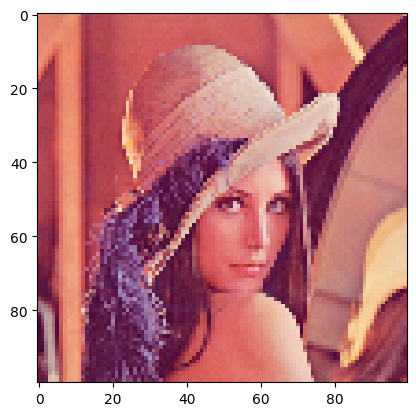

In [10]:
print("original image shape : {}".format(img.shape))

img_s = cv2.resize(src=img_rgb, dsize=(100, 100))
print("resized image shape : {}".format(img_s.shape))
plt.imshow(img_s)
plt.show()

### 이미지 자료형 변환

uint8 255


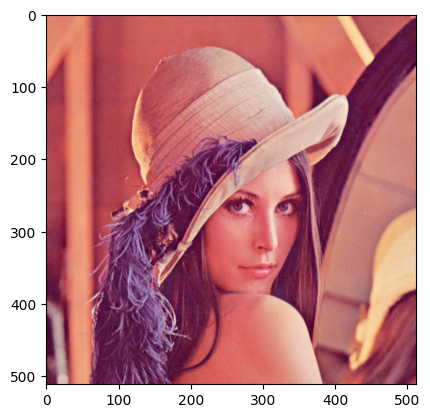

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float32 255.0


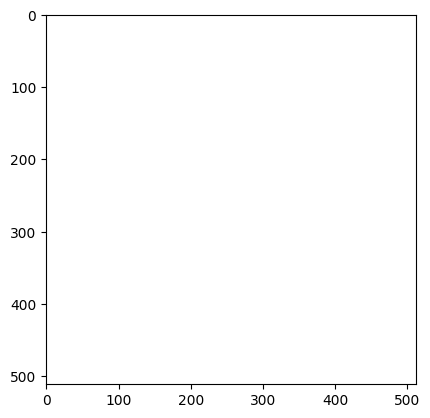

float32 1.0


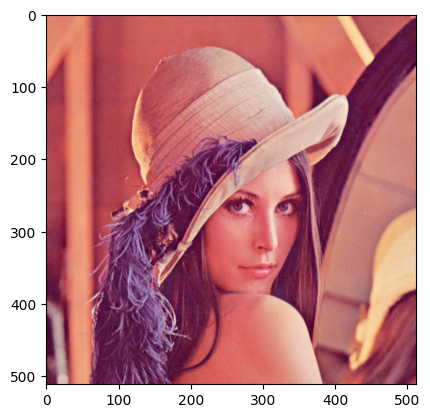

uint8 1


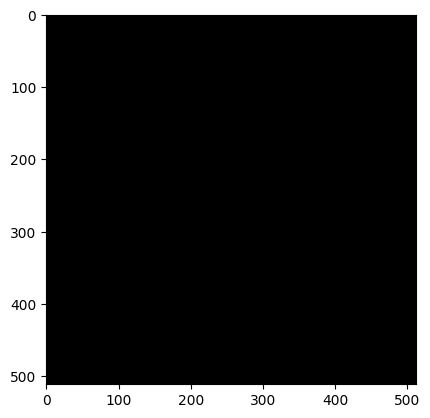

uint8 255


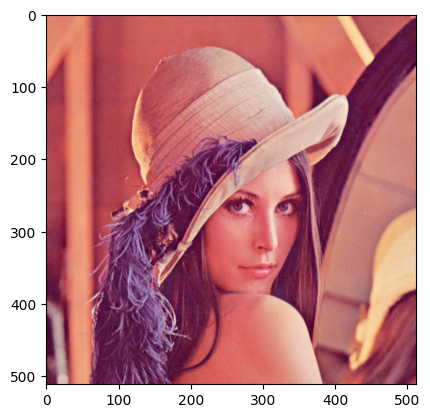

In [16]:
print(img_rgb.dtype, np.max(img_rgb))
plt.imshow(img_rgb)
plt.show()

img_float = img_rgb.astype(np.float32)
print(img_float.dtype, np.max(img_float))
plt.imshow(img_float)
plt.show()

img_float /= 255
print(img_float.dtype, np.max(img_float))
plt.imshow(img_float)
plt.show()

float2int = img_float.astype(np.uint8)
print(float2int.dtype, np.max(float2int))
plt.imshow(float2int)
plt.show()

float2int = (img_float * 255).astype(np.uint8)
print(float2int.dtype, np.max(float2int))
plt.imshow(float2int)
plt.show()


### Draw rectangle in opencv

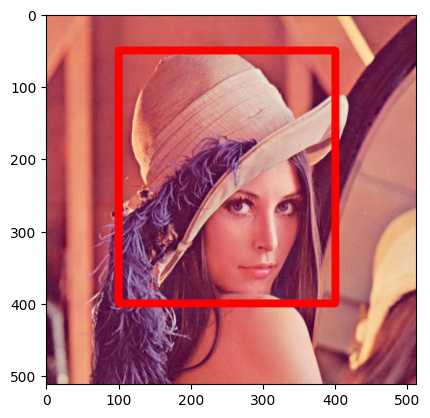

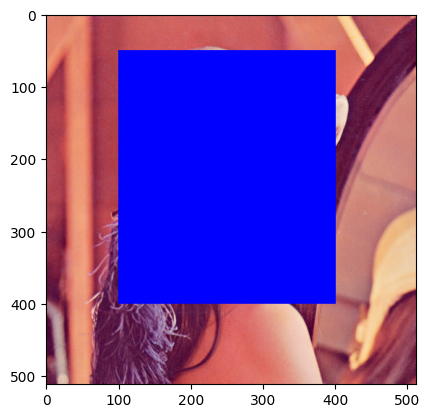

In [13]:
# draw rectangle
rectangle = cv2.rectangle(img_rgb.copy(), (100,50), (400,400), (255,0,0), 10)     # (image, pt1, pt2. color, thickness)
plt.imshow(rectangle)
plt.show()

rectangle_fill = cv2.rectangle(img_rgb.copy(), (100,50), (400,400), (0,0,255), -1) # (image, pt1, pt2. color, thickness)
plt.imshow(rectangle_fill)
plt.show()

### Pillow

In [38]:
img_pil = Image.open(img_root).convert('RGB')
print(type(img_pil))
print(img_pil.size)
print(img_pil.mode)
img_pil.show()

<class 'PIL.Image.Image'>
(512, 512)
RGB


### CV(numpy) to Pillow

<class 'numpy.ndarray'>


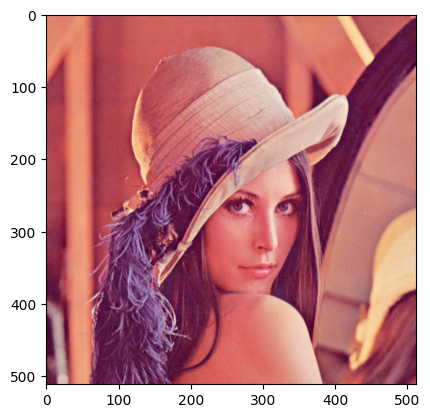

<class 'PIL.Image.Image'>


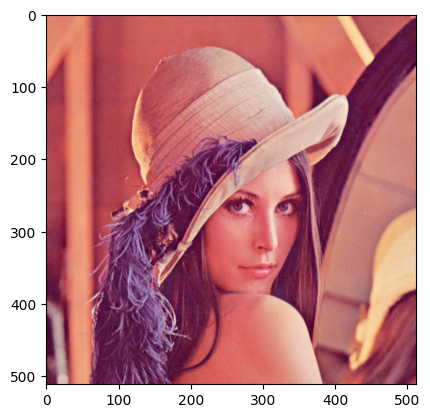

In [23]:
pil2np = np.array(img_pil)
print(type(pil2np))
plt.imshow(pil2np)
plt.show()

np2pil = Image.fromarray(img_rgb)
print(type(np2pil))
np2pil.show()
plt.imshow(np2pil)
plt.show()
# display(np2pil)

### Numpy to Tensor

In [24]:
img_torch = torch.from_numpy(img)

print(type(img_torch))
print(img_torch.shape)
print(img_torch.dtype)
print(img_torch.max())

<class 'torch.Tensor'>
torch.Size([512, 512, 3])
torch.uint8
tensor(255, dtype=torch.uint8)


### Pillow to Tensor

In [25]:
from torchvision import transforms

transform = transforms.ToTensor()
img_torch = transform(np2pil)

print(type(img_torch))
print(img_torch.shape)
print(img_torch.dtype)
print(img_torch.max())

<class 'torch.Tensor'>
torch.Size([3, 512, 512])
torch.float32
tensor(1.)


### Numpy, Tensor change dimension

(3, 512, 512)
(512, 512, 3)


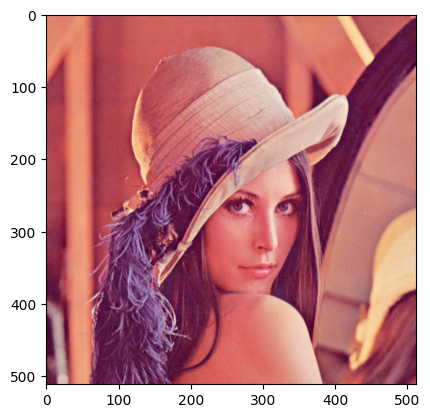

In [26]:
np_img = np.array(img_torch)
print(np_img.shape)
np_transpose = np_img.transpose(1,2,0)
print(np_transpose.shape)

# plt.imshow(np_img)
# plt.show()
plt.imshow(np_transpose)
plt.show()

In [19]:
print(img_torch.shape)
torch_transpose = img_torch.transpose(0,2)
print(torch_transpose.shape)
torch_permute = img_torch.permute(1,2,0)
print(torch_permute.shape)

torch.Size([3, 512, 512])
torch.Size([512, 512, 3])
torch.Size([512, 512, 3])
